<a href="https://colab.research.google.com/github/IngerMasha/week11/blob/main/Introduction_to_SciPy/Analysis_of_Airplane_Crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

# Attempt to read the file with different encodings
try:
    df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='cp1252')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='utf-16')
print(df.head())
print(df.info())
print('\nMissing values:')
print(df.isnull().sum())


        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [25]:
for column in ['Aboard', 'Aboard Passangers', 'Aboard Crew',
               'Fatalities', 'Fatalities Passangers',
               'Fatalities Crew', 'Ground']:
    df[column].fillna(df[column].mean(), inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Location'].fillna('Unknown', inplace=True)
df['Operator'].fillna('Unknown', inplace=True)
df['AC Type'].fillna('Unknown', inplace=True)
df['Registration'].fillna('Unknown', inplace=True)
df['cn/ln'].fillna('Unknown', inplace=True)
df['Time'].fillna('00:00', inplace=True)


print(df.describe())
print(df.head())
print(df.info())
print('\nMissing values:')
print(df.isnull().sum())
num_crashes = df.shape[0]
total_fatalities = df['Fatalities'].sum()

print(f"Number of crashes: {num_crashes}")
print(f"Total fatalities: {total_fatalities}")

                                Date       Aboard  Aboard Passangers  \
count                           4998  4998.000000        4998.000000   
mean   1971-07-04 09:31:37.238895528    31.195984          27.009017   
min              1908-09-17 00:00:00     0.000000           0.000000   
25%              1951-06-15 06:00:00     7.000000           3.000000   
50%              1970-11-27 00:00:00    16.000000          13.000000   
75%              1992-06-06 18:00:00    35.000000          29.000000   
max              2023-11-01 00:00:00   644.000000         614.000000   
std                              NaN    45.452702          43.088993   

       Aboard Crew   Fatalities  Fatalities Passangers  Fatalities Crew  \
count  4998.000000  4998.000000            4998.000000      4998.000000   
mean      4.479254    22.373547              19.053827         3.578516   
min       0.000000     0.000000               0.000000         0.000000   
25%       2.000000     4.000000               1.000

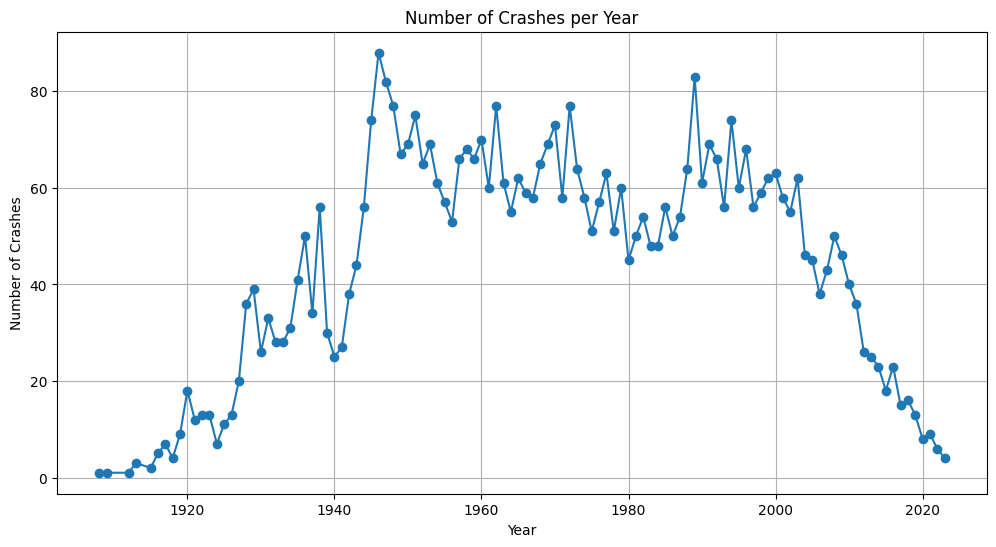

In [26]:
import matplotlib.pyplot as plt

df['Year'] = df['Date'].dt.year

crashes_per_year = df.groupby('Year').size()
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


In [27]:
import numpy as np
import scipy.stats as stats

mean_fatalities = df['Fatalities'].mean()
median_fatalities = df['Fatalities'].median()
std_fatalities = df['Fatalities'].std()

print(f"Mean fatalities: {mean_fatalities}")
print(f"Median fatalities: {median_fatalities}")
print(f"Standard deviation of fatalities: {std_fatalities}")


Mean fatalities: 22.37354709418838
Median fatalities: 11.0
Standard deviation of fatalities: 35.03366318524217


In [28]:
df['Decade'] = (df['Year'] // 10) * 10
df_1900s = df[df['Decade'] == 1900]['Fatalities']
df_2000s = df[df['Decade'] == 2000]['Fatalities']
t_stat, p_value = stats.ttest_ind(df_1900s, df_2000s, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.7578477393471567, P-value: 0.4488949324619722


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


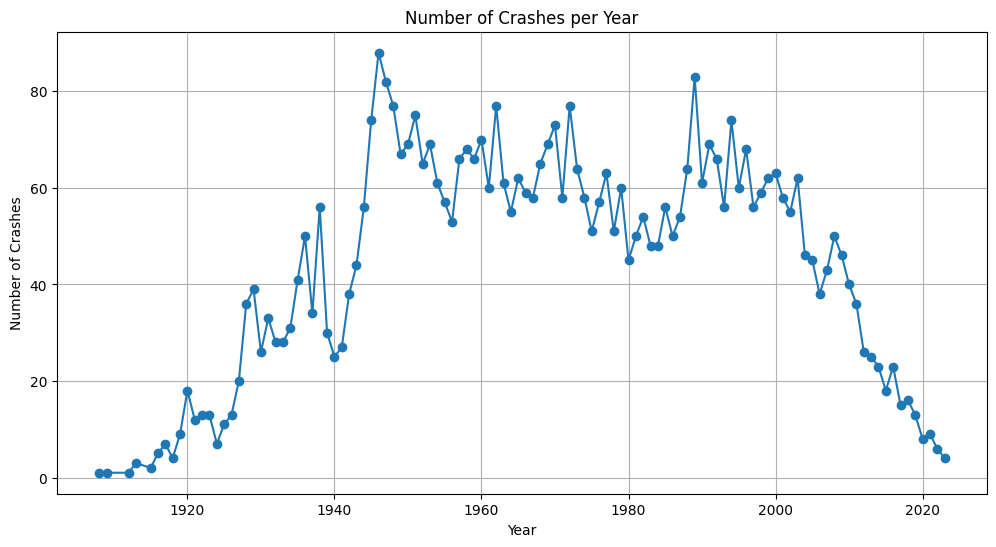

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()



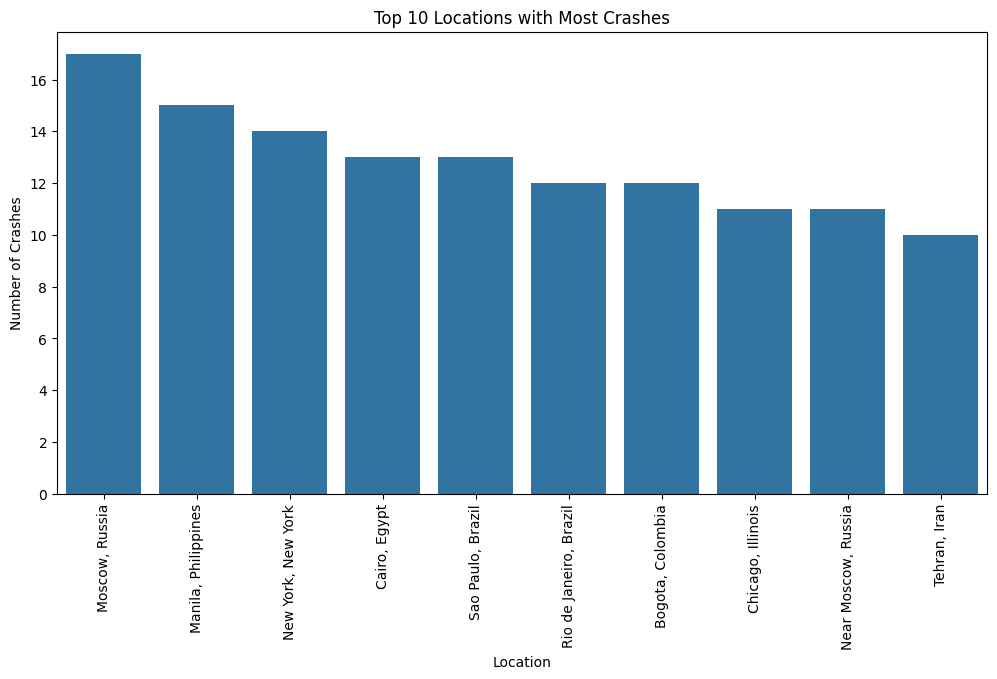

In [32]:
import seaborn as sns

plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations with Most Crashes')
plt.xlabel('Location')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()


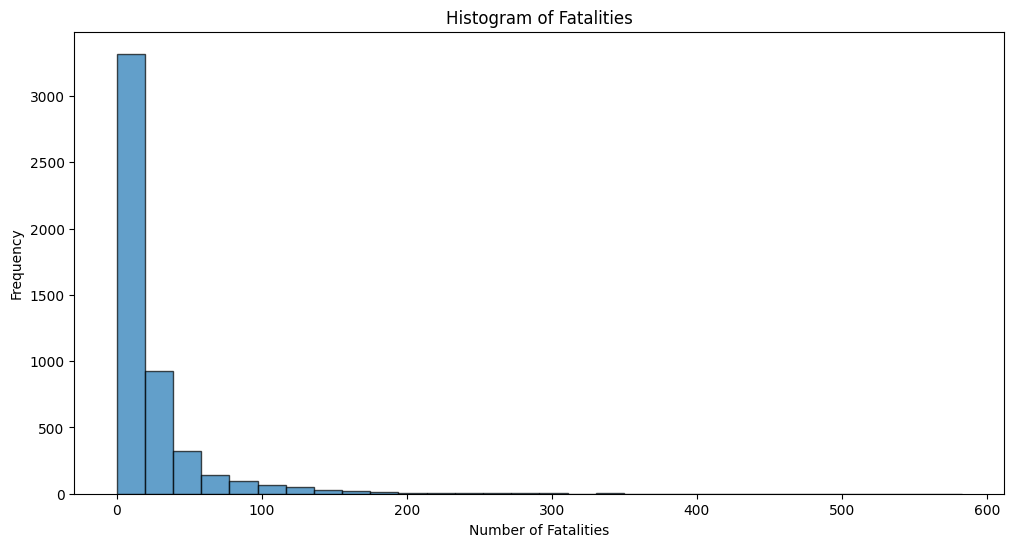

In [33]:
plt.figure(figsize=(12, 6))
plt.hist(df['Fatalities'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()
